In [2]:
import pandas as pd
import seaborn as sns



In [3]:
tlc = pd.read_parquet("/Users/jiang/Desktop/fhvhv_tripdata_2024-01.parquet", engine='pyarrow')
tlc.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-01-01 00:21:47,2024-01-01 00:25:06,2024-01-01 00:28:08,2024-01-01 01:05:39,161,158,2.83,...,4.05,2.75,0.0,0.0,40.18,N,N,N,N,N
1,HV0003,B03404,B03404,2024-01-01 00:10:56,2024-01-01 00:11:08,2024-01-01 00:12:53,2024-01-01 00:20:05,137,79,1.57,...,0.89,2.75,0.0,0.0,6.12,N,N,N,N,N
2,HV0003,B03404,B03404,2024-01-01 00:20:04,2024-01-01 00:21:51,2024-01-01 00:23:05,2024-01-01 00:35:16,79,186,1.98,...,1.60,2.75,0.0,0.0,9.47,N,N,N,N,N
3,HV0003,B03404,B03404,2024-01-01 00:35:46,2024-01-01 00:39:59,2024-01-01 00:41:04,2024-01-01 00:56:34,234,148,1.99,...,1.52,2.75,0.0,0.0,11.35,N,N,N,N,N
4,HV0003,B03404,B03404,2024-01-01 00:48:19,2024-01-01 00:56:23,2024-01-01 00:57:21,2024-01-01 01:10:02,148,97,2.65,...,3.43,2.75,0.0,0.0,28.63,N,N,N,N,N


In [4]:
len(tlc)

19663930

In [5]:

# Filter the DataFrame to include only rows within this date range
tlc = tlc[(tlc['request_datetime'] >= pd.Timestamp('2024-01-25'))]

In [6]:
len(tlc)

4564979

In [7]:
tlc.dtypes

hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[us]
on_scene_datetime       datetime64[us]
pickup_datetime         datetime64[us]
dropoff_datetime        datetime64[us]
PULocationID                     int32
DOLocationID                     int32
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object

In [8]:
tlc.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,4564979,3413195,4564979,4564979,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06
mean,2024-01-28 10:40:56.118448,2024-01-28 10:50:49.166198,2024-01-28 10:44:57.121614,2024-01-28 11:04:04.222500,1.394738e+02,1.429904e+02,4.860329e+00,1.147101e+03,2.408963e+01,1.082008e+00,6.943062e-01,2.033201e+00,1.099568e+00,1.821833e-01,1.073683e+00,1.847170e+01
min,2024-01-25 00:00:00,2024-01-24 23:40:01,2024-01-24 23:51:18,2024-01-25 00:02:20,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.663000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.776000e+01
25%,2024-01-26 18:33:19,2024-01-26 18:39:39,2024-01-26 18:37:17,2024-01-26 18:57:11,7.600000e+01,7.600000e+01,1.520000e+00,5.890000e+02,1.181000e+01,0.000000e+00,3.200000e-01,1.020000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.330000e+00
50%,2024-01-28 06:05:28,2024-01-28 06:39:04,2024-01-28 06:10:25,2024-01-28 06:29:19,1.410000e+02,1.420000e+02,2.870000e+00,9.440000e+02,1.827000e+01,0.000000e+00,5.000000e-01,1.570000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.381000e+01
75%,2024-01-30 06:21:05,2024-01-30 06:32:46,2024-01-30 06:24:48,2024-01-30 06:43:02,2.110000e+02,2.190000e+02,6.030000e+00,1.484000e+03,2.888000e+01,0.000000e+00,8.200000e-01,2.490000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.319000e+01
max,2024-02-01 00:07:07,2024-01-31 23:59:58,2024-01-31 23:59:59,2024-02-01 02:10:41,2.650000e+02,2.650000e+02,2.611700e+02,4.319000e+04,1.319340e+03,1.410200e+02,3.779000e+01,1.079100e+02,5.500000e+00,5.000000e+00,1.779800e+02,7.521100e+02
std,NaN,NaN,NaN,NaN,7.489596e+01,7.771066e+01,5.658901e+00,7.892191e+02,2.027040e+01,3.833467e+00,6.242383e-01,1.656496e+00,1.342470e+00,6.516554e-01,3.156797e+00,1.544022e+01


<AxesSubplot:>

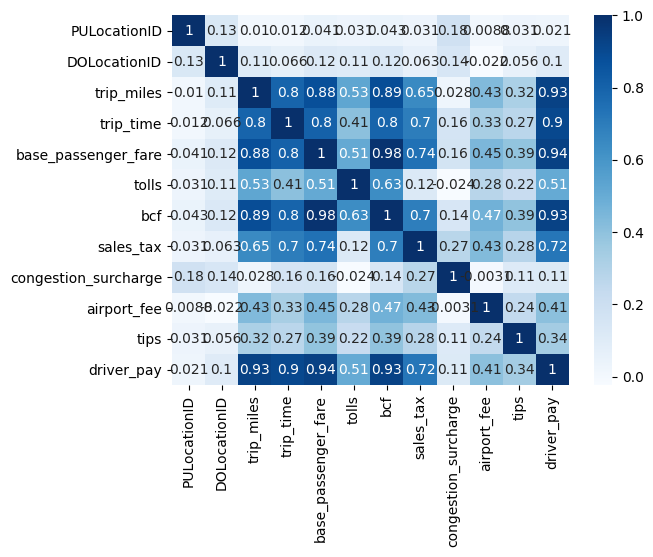

In [9]:
numeric_data = tlc.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), cmap="Blues", annot=True)

In [10]:
pickUpID = tlc['PULocationID']
dropOffID = tlc['DOLocationID']

In [11]:
pickUpID.value_counts()

PULocationID
138    77364
132    72212
79     66337
61     59297
161    58165
       ...  
110        4
2          3
1          1
105        1
199        1
Name: count, Length: 262, dtype: int64

In [12]:
dropOffID.value_counts()

DOLocationID
265    179343
132     86157
138     84221
61      61445
79      56218
        ...  
99        121
8         102
110        13
2           5
105         1
Name: count, Length: 261, dtype: int64

In [13]:
tlc_nta = pd.read_csv("taxi-zone-lookup-with-ntacode.csv")

In [14]:
tlc_nta

,location_id,borough,zone,service_zone,ntacode
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48
...,...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone,MN25
261,262,Manhattan,Yorkville East,Yellow Zone,MN32
262,263,Manhattan,Yorkville West,Yellow Zone,MN32
263,264,Unknown,NV,NaN,NaN


In [15]:
pu_df = tlc.merge(tlc_nta, how="left", left_on='PULocationID', right_on="location_id")
do_df = tlc.merge(tlc_nta, how="left", left_on='DOLocationID', right_on="location_id")

In [16]:
pu_df['zone'].value_counts()

zone
LaGuardia Airport                                77364
JFK Airport                                      72212
East Village                                     66337
Crown Heights North                              59297
Midtown Center                                   58165
                                                 ...  
Great Kills Park                                     4
Jamaica Bay                                          3
Newark Airport                                       1
Governor's Island/Ellis Island/Liberty Island        1
Rikers Island                                        1
Name: count, Length: 260, dtype: int64

In [17]:
do_df['zone'].value_counts()

zone
JFK Airport                                      86157
LaGuardia Airport                                84221
Crown Heights North                              61445
East Village                                     56218
Midtown Center                                   50798
                                                 ...  
Freshkills Park                                    121
Astoria Park                                       102
Great Kills Park                                    13
Jamaica Bay                                          5
Governor's Island/Ellis Island/Liberty Island        1
Name: count, Length: 259, dtype: int64

In [18]:
nta = pd.read_csv("Neighborhood_Cleaned.csv")

In [19]:
nta.head()

,Neighborhood Tabulation Area (NTA) Name,NTA Code,Boro Name,Boro CD,Total Population,65+ years,%65+ yeras,%65+ Below poverty,% Hispanic/Latino,% White,% Black/African American,% Asian,% Other
0,Claremont-Bathgate,BX01,Bronx,203,"35,560","2,692",7.6,42.1,60.6,1.0,37.3,0.1,1.00%
1,Eastchester-Edenwald-Baychester,BX03,Bronx,212,"37,887","4,939",13.0,11.7,24.6,3.1,66.0,4.2,2.20%
2,Bedford Park-Fordham North,BX05,Bronx,207,"57,685","4,993",8.7,30.0,75.0,4.2,15.6,3.8,1.50%
3,Belmont,BX06,Bronx,206,"29,115","2,197",7.5,28.9,61.0,18.2,16.3,2.1,2.40%
4,Bronxdale,BX07,Bronx,211,"39,423","4,780",12.1,23.2,54.9,13.9,26.1,2.9,2.20%


In [20]:
nta.dtypes

Neighborhood Tabulation Area (NTA) Name     object
NTA Code                                    object
Boro Name                                   object
Boro CD                                      int64
Total Population                            object
65+ years                                   object
%65+ yeras                                 float64
%65+ Below poverty                         float64
% Hispanic/Latino                          float64
% White                                    float64
% Black/African American                   float64
% Asian                                    float64
% Other                                     object
dtype: object

In [21]:
# Changes all elements in column '% Other' to be floats by removing the % symbol
nta['% Other'] = nta["% Other"].str[:-1].astype(float)

In [22]:
nta.describe()

,Boro CD,%65+ yeras,%65+ Below poverty,% Hispanic/Latino,% White,% Black/African American,% Asian,% Other
count,195.000000,193.000000,192.000000,193.000000,193.000000,192.000000,193.000000,193.000000
mean,309.379487,14.373575,19.559375,28.407254,33.238342,21.663542,13.713472,2.958031
std,122.690708,5.113216,11.075841,20.924566,27.141011,24.881407,14.989383,2.530862
min,101.000000,0.700000,4.300000,3.900000,0.700000,0.100000,0.100000,0.000000
25%,208.000000,11.200000,10.375000,11.700000,6.600000,3.000000,3.200000,1.700000
50%,312.000000,13.300000,17.250000,20.900000,25.600000,9.900000,8.700000,2.500000
75%,408.000000,16.900000,25.575000,40.500000,59.300000,31.050000,17.500000,3.200000
max,595.000000,37.600000,73.000000,88.000000,92.600000,89.800000,71.600000,21.800000


In [23]:
nta.isnull().sum()

Neighborhood Tabulation Area (NTA) Name    0
NTA Code                                   0
Boro Name                                  0
Boro CD                                    0
Total Population                           3
65+ years                                  2
%65+ yeras                                 2
%65+ Below poverty                         3
% Hispanic/Latino                          2
% White                                    2
% Black/African American                   3
% Asian                                    2
% Other                                    2
dtype: int64

In [24]:
nta[nta.isnull().any(axis=1)]

,Neighborhood Tabulation Area (NTA) Name,NTA Code,Boro Name,Boro CD,Total Population,65+ years,%65+ yeras,%65+ Below poverty,% Hispanic/Latino,% White,% Black/African American,% Asian,% Other
55,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum H,BK38,Brooklyn,302,NaN,"3,994",8.8,23.3,19.1,44.5,20.3,11.8,4.4
88,park-cemetery-etc-Brooklyn,BK99,Brooklyn,318,432,8,1.9,NaN,23.8,51.2,11.8,7.6,5.6
174,Airport,QN98,Queens,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,park-cemetery-etc-Queens,QN99,Queens,409,159,48,30.2,31.2,44.0,45.3,NaN,10.7,0.0
194,park-cemetery-etc-Staten Island,SI99,Staten Isla,595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
nta = nta[~nta.isnull().any(axis=1)]
nta.describe()

,Boro CD,%65+ yeras,%65+ Below poverty,% Hispanic/Latino,% White,% Black/African American,% Asian,% Other
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,306.431579,14.385263,19.478421,28.398421,33.021053,21.722632,13.771579,2.952105
std,121.647783,4.924122,11.098415,21.045905,27.297103,25.002149,15.098987,2.532325
min,101.000000,0.700000,4.300000,3.900000,0.700000,0.100000,0.100000,0.300000
25%,208.000000,11.225000,10.325000,11.550000,6.525000,3.000000,3.200000,1.700000
50%,311.500000,13.450000,17.100000,20.750000,24.900000,9.700000,8.650000,2.500000
75%,408.000000,16.900000,25.450000,40.225000,60.350000,31.150000,17.875000,3.200000
max,503.000000,37.600000,73.000000,88.000000,92.600000,89.800000,71.600000,21.800000


<AxesSubplot:xlabel='% Asian', ylabel='Count'>

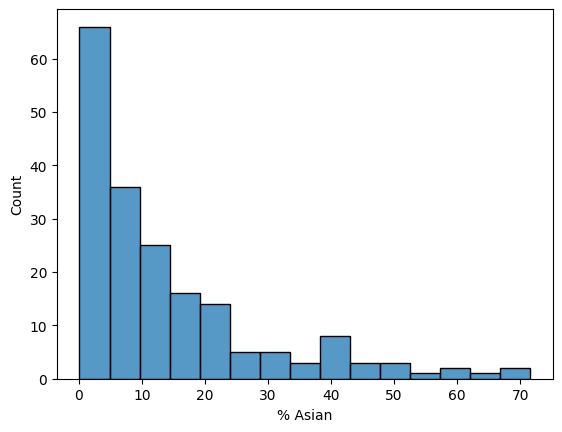

In [26]:
sns.histplot(nta['% Asian'])

<AxesSubplot:xlabel='% Black/African American', ylabel='Count'>

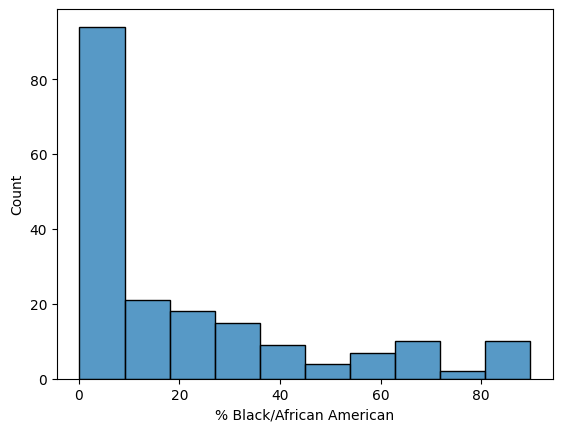

In [27]:
sns.histplot(nta['% Black/African American'])

<AxesSubplot:xlabel='% Hispanic/Latino', ylabel='Count'>

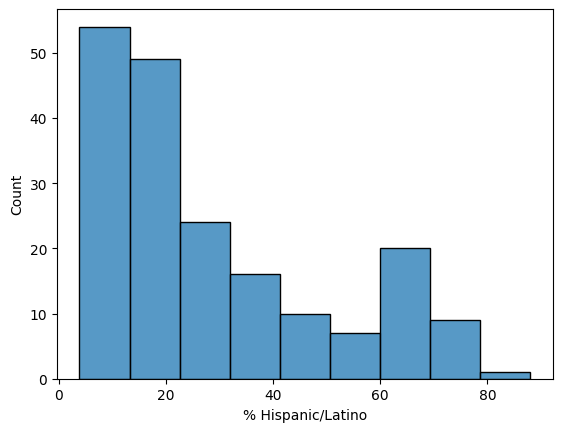

In [28]:
sns.histplot(nta['% Hispanic/Latino'])

<AxesSubplot:xlabel='% Other', ylabel='Count'>

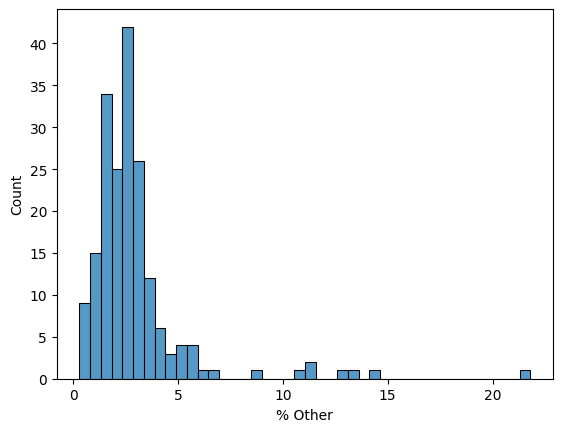

In [29]:
sns.histplot(nta['% Other'])

In [30]:
mrgd = tlc.merge(tlc_nta, how="left", left_on='PULocationID', right_on="location_id", suffixes=(None, "PU"))
mrgd = mrgd.merge(tlc_nta, how="left", left_on='DOLocationID', right_on="location_id", suffixes=(None, "DO"))

In [31]:
mrgd.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,location_id,borough,zone,service_zone,ntacode,location_idDO,boroughDO,zoneDO,service_zoneDO,ntacodeDO
0,HV0005,B03406,None,2024-01-25 00:05:00,NaT,2024-01-24 23:51:18,2024-01-25 00:17:30,127,95,15.181,...,127,Manhattan,Inwood,Boro Zone,MN01,95,Queens,Forest Hills,Boro Zone,QN17
1,HV0003,B03404,B03404,2024-01-25 00:09:00,2024-01-24 23:57:55,2024-01-24 23:59:44,2024-01-25 00:08:16,223,7,1.580,...,223,Queens,Steinway,Boro Zone,QN72,7,Queens,Astoria,Boro Zone,QN70
2,HV0005,B03406,B03406,2024-01-25 00:06:31,2024-01-24 23:58:27,2024-01-24 23:59:15,2024-01-25 00:02:20,206,206,0.605,...,206,Staten Island,Saint George/New Brighton,Boro Zone,SI35,206,Staten Island,Saint George/New Brighton,Boro Zone,SI35
3,HV0003,B03404,B03404,2024-01-25 00:45:03,2024-01-25 00:46:18,2024-01-25 00:46:18,2024-01-25 00:56:22,211,230,2.600,...,211,Manhattan,SoHo,Yellow Zone,MN24,230,Manhattan,Times Sq/Theatre District,Yellow Zone,MN17
4,HV0003,B03404,B03404,2024-01-25 00:05:55,2024-01-25 00:07:33,2024-01-25 00:09:08,2024-01-25 00:16:43,62,188,1.500,...,62,Brooklyn,Crown Heights South,Boro Zone,BK63,188,Brooklyn,Prospect-Lefferts Gardens,Boro Zone,BK60


In [32]:
mrgd.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'location_id', 'borough', 'zone',
       'service_zone', 'ntacode', 'location_idDO', 'boroughDO', 'zoneDO',
       'service_zoneDO', 'ntacodeDO'],
      dtype='object')

In [33]:
mrgd = mrgd.merge(nta, how="left", left_on='ntacode', right_on="NTA Code", suffixes=(None, "PU"))
mrgd = mrgd.merge(nta, how="left", left_on='ntacodeDO', right_on="NTA Code", suffixes=(None, "DO"))

In [34]:
mrgd.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,Boro CDDO,Total PopulationDO,65+ yearsDO,%65+ yerasDO,%65+ Below povertyDO,% Hispanic/LatinoDO,% WhiteDO,% Black/African AmericanDO,% AsianDO,% OtherDO
0,HV0005,B03406,None,2024-01-25 00:05:00,NaT,2024-01-24 23:51:18,2024-01-25 00:17:30,127,95,15.181,...,406.0,"88,313","17,622",20.0,13.8,15.8,49.9,2.4,27.5,4.4
1,HV0003,B03404,B03404,2024-01-25 00:09:00,2024-01-24 23:57:55,2024-01-24 23:59:44,2024-01-25 00:08:16,223,7,1.580,...,401.0,"74,767","9,731",13.0,16.7,26.4,50.3,3.6,16.7,3.0
2,HV0005,B03406,B03406,2024-01-25 00:06:31,2024-01-24 23:58:27,2024-01-24 23:59:15,2024-01-25 00:02:20,206,206,0.605,...,501.0,"17,105","2,902",17.0,9.0,23.8,60.8,7.3,5.8,2.4
3,HV0003,B03404,B03404,2024-01-25 00:45:03,2024-01-25 00:46:18,2024-01-25 00:46:18,2024-01-25 00:56:22,211,230,2.600,...,105.0,"27,875","4,011",14.4,15.1,9.8,61.5,4.5,20.8,3.3
4,HV0003,B03404,B03404,2024-01-25 00:05:55,2024-01-25 00:07:33,2024-01-25 00:09:08,2024-01-25 00:16:43,62,188,1.500,...,309.0,"69,111","10,130",14.7,21.3,9.6,17.0,68.4,2.3,2.7


In [35]:
mrgd.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'location_id', 'borough', 'zone',
       'service_zone', 'ntacode', 'location_idDO', 'boroughDO', 'zoneDO',
       'service_zoneDO', 'ntacodeDO',
       'Neighborhood Tabulation Area (NTA) Name', 'NTA Code', 'Boro Name',
       'Boro CD', 'Total Population', '65+ years', '%65+ yeras',
       '%65+ Below poverty', '% Hispanic/Latino', '% White',
       '% Black/African American', '% Asian', '% Other',
       'Neighborhood Tabulation Area (NTA) NameDO', 'NTA CodeDO',
       'Boro NameDO', 'Boro CDDO', 'Total PopulationDO',

In [36]:
mrgd = mrgd.drop(columns=['dispatching_base_num', 'originating_base_num',\
                          'location_id', 'service_zone', 'ntacode',\
                          'location_idDO', 'service_zoneDO', 'ntacodeDO',\
                          'NTA Code', 'NTA CodeDO'])

In [37]:
mrgd = mrgd.rename(columns={'hvfhs_license_num': 'Ride-Hailing Service Number',\
                            'request_datetime': 'Request Datetime',\
                            'on_scene_datetime': 'On-Scene Datetime',\
                            'pickup_datetime': 'Pick-Up Datetime',\
                            'dropoff_datetime': 'Drop-Off Datetime',\
                            'PULocationID': 'Pick-Up Location ID',\
                            'DOLocationID': 'Drop-Off Location ID',\
                            'trip_miles': 'Trip Distance (miles)',\
                            'trip_time': 'Trip Length (seconds)',\
                            'base_passenger_fare': 'Base Passenger Fare',\
                            'tolls': 'Toll Fare',\
                            'bcf': 'Black Car Fund Fare',\
                            'sales_tax': 'NYS Sales Tax Fare',\
                            'congestion_surcharge': 'NYS Congestion Surcharge',\
                            'airport_fee': 'Airport Fee',\
                            'tips': 'Tips Given',\
                            'driver_pay': 'Driver Pay',\
                            'shared_request_flag': 'Passenger Agreed to Share Ride', \
                            'shared_match_flag': 'Passenger Shared Ride',\
                            'access_a_ride_flag': 'Administered by MTA',\
                            'wav_request_flag': 'Passenger Requested WAV',\
                            'wav_match_flag': 'Passenger Rode in WAV'})


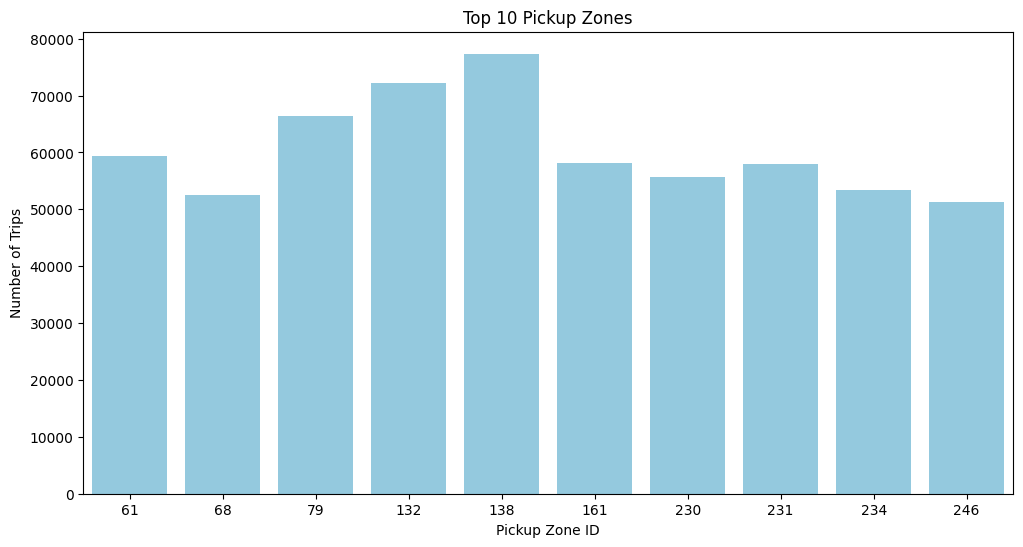

In [38]:
import matplotlib.pyplot as plt

top_pickup_zones = tlc['PULocationID'].value_counts().head(10)
top_dropoff_zones = tlc['DOLocationID'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, color='skyblue')
plt.title('Top 10 Pickup Zones')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Number of Trips')
plt.show()

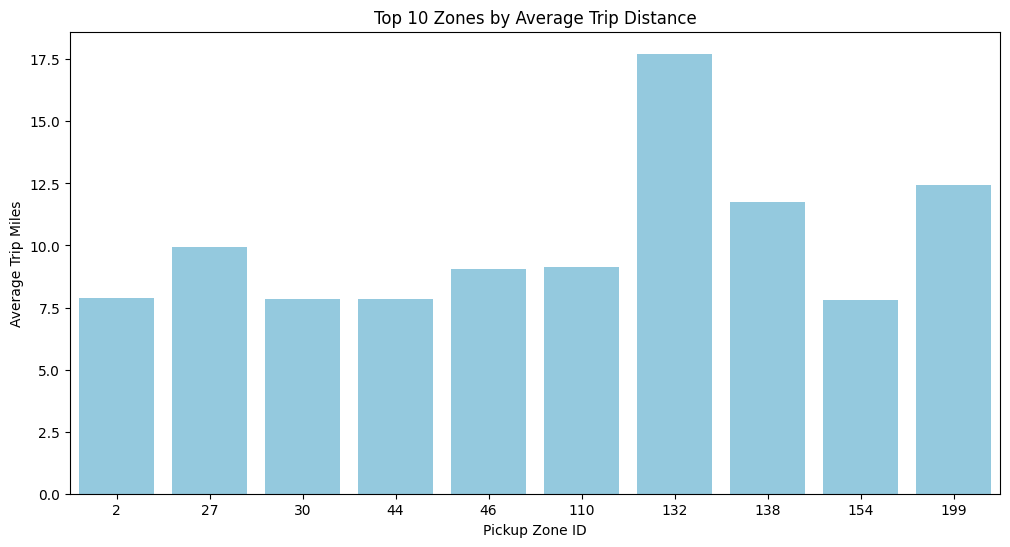

In [39]:
avg_trip_distance = tlc.groupby('PULocationID')['trip_miles'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=avg_trip_distance.index, y=avg_trip_distance.values, color='skyblue')
plt.title('Top 10 Zones by Average Trip Distance')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Average Trip Miles')
plt.show()

In [40]:
mrgd.columns

Index(['Ride-Hailing Service Number', 'Request Datetime', 'On-Scene Datetime',
       'Pick-Up Datetime', 'Drop-Off Datetime', 'Pick-Up Location ID',
       'Drop-Off Location ID', 'Trip Distance (miles)',
       'Trip Length (seconds)', 'Base Passenger Fare', 'Toll Fare',
       'Black Car Fund Fare', 'NYS Sales Tax Fare', 'NYS Congestion Surcharge',
       'Airport Fee', 'Tips Given', 'Driver Pay',
       'Passenger Agreed to Share Ride', 'Passenger Shared Ride',
       'Administered by MTA', 'Passenger Requested WAV',
       'Passenger Rode in WAV', 'borough', 'zone', 'boroughDO', 'zoneDO',
       'Neighborhood Tabulation Area (NTA) Name', 'Boro Name', 'Boro CD',
       'Total Population', '65+ years', '%65+ yeras', '%65+ Below poverty',
       '% Hispanic/Latino', '% White', '% Black/African American', '% Asian',
       '% Other', 'Neighborhood Tabulation Area (NTA) NameDO', 'Boro NameDO',
       'Boro CDDO', 'Total PopulationDO', '65+ yearsDO', '%65+ yerasDO',
       '%65+ Below p

In [48]:
shared_ride_vs_demographics = mrgd.groupby('zone').agg({
    'Passenger Agreed to Share Ride': 'mean',
    '% Hispanic/Latino': 'mean',
    '% Black/African American': 'mean',
    '% White': 'mean',
    '% Asian': 'mean',
    '%65+ Below poverty': 'mean'
}).dropna()

shared_ride_vs_demographics['Shared Ride %'] = shared_ride_vs_demographics['Passenger Agreed to Share Ride'] * 100

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=shared_ride_vs_demographics,
    x='%65+ Below poverty',
    y='Shared Ride %',
    hue='% Black/African American',
    size='% Hispanic/Latino', 
    sizes=(50, 200),
    palette='coolwarm'
)
plt.title('Shared Ride Requests vs % Poverty and Demographics')
plt.xlabel('% 65+ Below Poverty Line')
plt.ylabel('Shared Ride Requests (%)')
plt.legend(title='% Black/African American')
plt.show()


TypeError: Could not convert NNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNYNNNNYNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNYYNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNYNNNYYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNYNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNYNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNYNNNNNNYNNYNNNNNYNNNNNNNNNNNYNNNNNNNNNNNNNYNNNNNNYNNNYNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNYNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNYYNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNYNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNYNNNYNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNYNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNYNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNYYNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNYNNNNNNNYNNNNNNNNNNYNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNYNNNNNNNNNNNYNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNYNNNNNYNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNYNNNNYNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNYNNNNYNNYNNNNNNNNNNNNNNNNNNNNNNYNNYNNNNNNNNNYYNNNNNNNNNNNNNNYNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNYNYNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNYYNNNNNNNNNNNNYNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNYNYNNNNNNNNNNNNNNNNYNNNNNNNNNYNNNNNNNNNYNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNYNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNYNNNNNNNNNNNNNNNYNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNYNNNYNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNYNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNYNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNYNNNNNNNNYNNNNNNNNNNNNNYNNNNYNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNYNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYYYNNNNNNNNNNNNNNNNNNNNNNNNNNNNYYNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNYNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNYNYNYNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNYNYNNNNNNNNYNNYNNYNNNNNNNNNNNNNNNYYNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNYNNNNNNYNNNNNNNNNNNNYNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNYNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNYNNNYNNNNYNYNNNNYNNNNNNNNNYNNYNNNNNNNNNNNYNNNNNNNNNNNNNNYNNNNNNNNYNNNYNNNNNNNNNNYNNNNNYNNNYNNNNNNNNNNYNYNNNNNNNNNNNYNNYNNNNNNNNNNNNNNNNNNNNNNNNNYYNNNNNNNNNNYNNNNNNNNNNYYNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNYYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNYNNNNNNNNNNNNNNYNNNNNNYNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNYNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNYYNNNNNNNNNNYNNNNNNNNNNNNNYNYNNNNNNNNNNNNNYNNNNNNNNYNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNYNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNYNNNNNNNYNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNYNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNYYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNYNNNNNNNNNNNNNNNNNNNNNYNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNYNNNNNNNYNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNYNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNYNNYYNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYYNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNYNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNYNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNYNYNNYNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNYNYNYNNNNNNNNYNNNNNNNNNNNNNYNNNNNYNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNYYNNNNNNYNNNNNYNNNNNNNNNNNNNNNNNYNNYNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNYNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNNNNNNYNYNNNNNNNNNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNYNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYYNNNNNNNNYNNNNNNNNNNNNNNNNNNNN to numeric

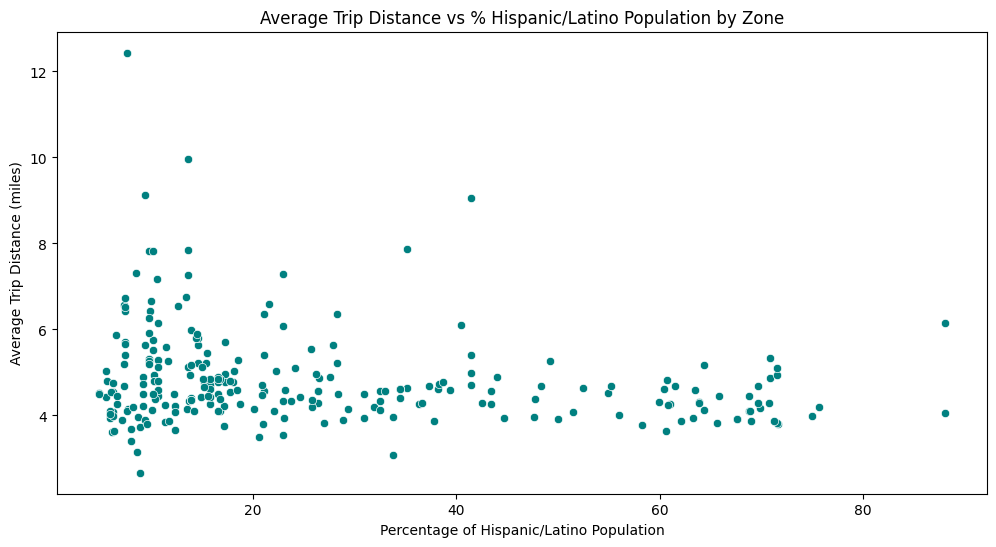

In [41]:
distance_vs_demographics = mrgd.groupby('zone').agg({
    'Trip Distance (miles)': 'mean',
    '% Hispanic/Latino': 'mean'
}).dropna()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=distance_vs_demographics['% Hispanic/Latino'], 
                y=distance_vs_demographics['Trip Distance (miles)'], color='teal')
plt.title('Average Trip Distance vs % Hispanic/Latino Population by Zone')
plt.xlabel('Percentage of Hispanic/Latino Population')
plt.ylabel('Average Trip Distance (miles)')
plt.show()


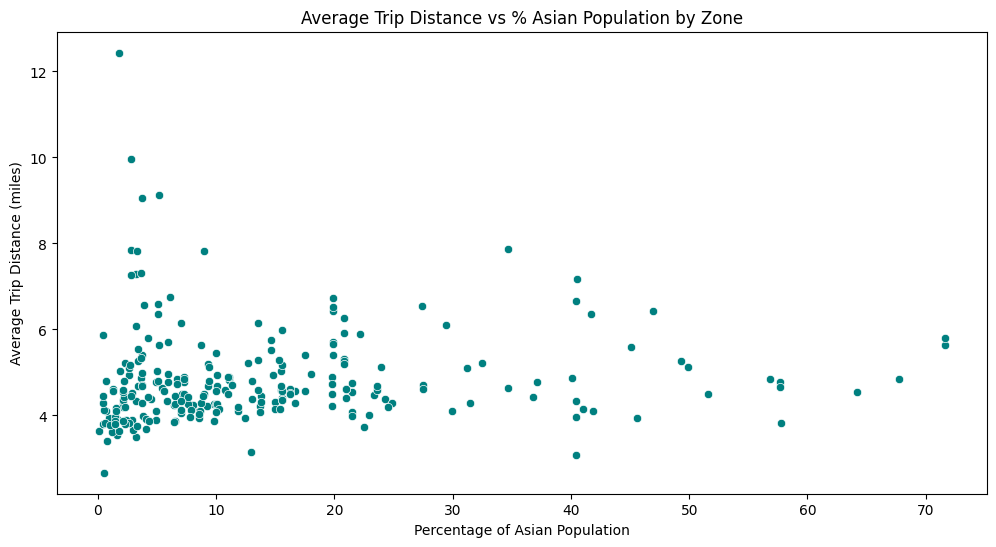

In [47]:
distance_vs_demographics = mrgd.groupby('zone').agg({
    'Trip Distance (miles)': 'mean',
    '% Asian': 'mean'
}).dropna()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=distance_vs_demographics['% Asian'], 
                y=distance_vs_demographics['Trip Distance (miles)'], color='teal')
plt.title('Average Trip Distance vs % Asian Population by Zone')
plt.xlabel('Percentage of Asian Population')
plt.ylabel('Average Trip Distance (miles)')
plt.show()


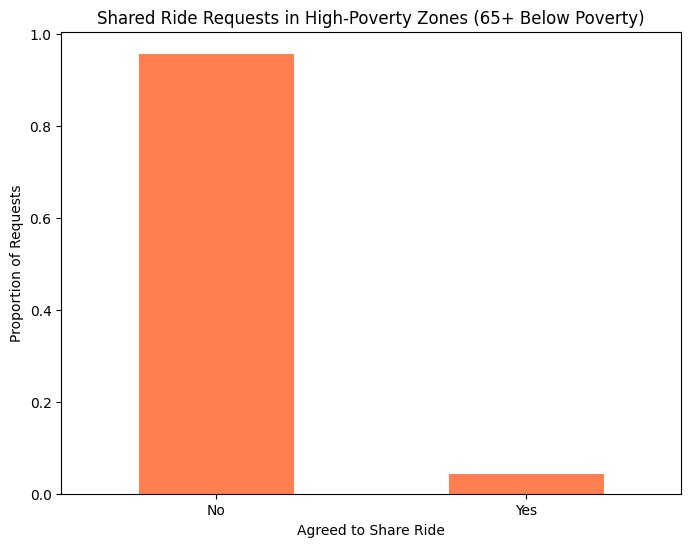

In [42]:
high_poverty_zones = mrgd[mrgd['%65+ Below poverty'] > 20]

shared_ride_requests = high_poverty_zones['Passenger Agreed to Share Ride'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
shared_ride_requests.plot(kind='bar', color='coral')
plt.title('Shared Ride Requests in High-Poverty Zones (65+ Below Poverty)')
plt.xlabel('Agreed to Share Ride')
plt.ylabel('Proportion of Requests')
plt.xticks([0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


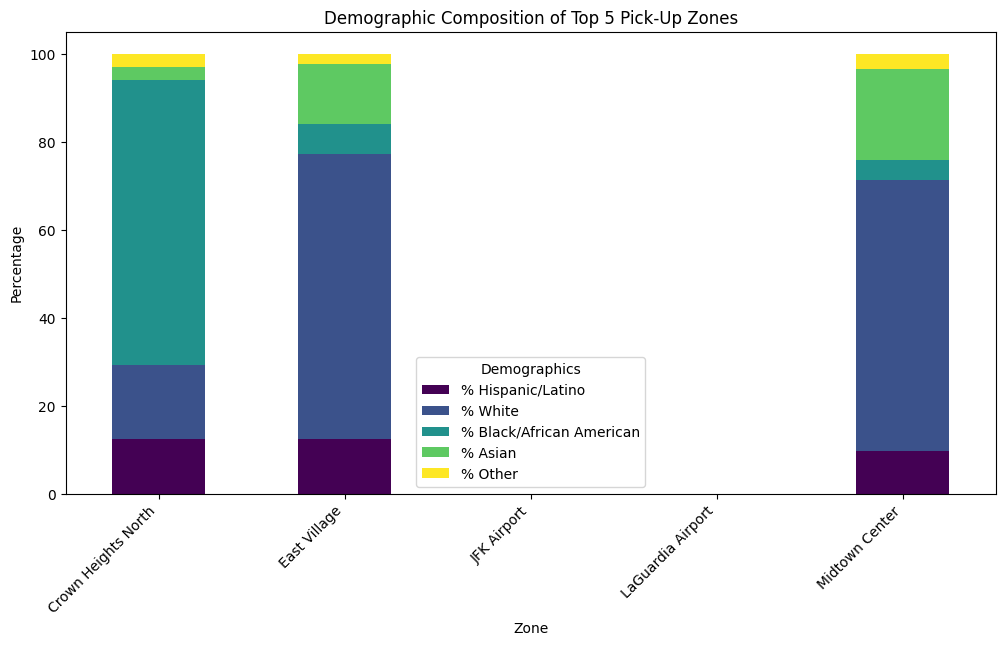

In [43]:
top_pickup_zones = mrgd['zone'].value_counts().head(5).index

demographics_top_zones = mrgd[mrgd['zone'].isin(top_pickup_zones)][
    ['zone', '% Hispanic/Latino', '% White', '% Black/African American', '% Asian', '% Other']
].groupby('zone').mean()

demographics_top_zones.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Demographic Composition of Top 5 Pick-Up Zones')
plt.xlabel('Zone')
plt.ylabel('Percentage')
plt.legend(title='Demographics')
plt.xticks(rotation=45, ha='right')
plt.show()
